# In-Class Exercises
The goal of this Jupyter Notebook and the in-class exercises is to give you practical experience applying basic signal processing and signal comparison approaches, which are widely used in ubiquitous computing (and physics, electrical engineering, astronomy, and beyond!) and important to completing assignment 2 (A2: Gesture Recognizer)

# FFT
A Fast Fourier Transform (FFT) samples a signal and extracts the frequency components. It is used to transform a signal from the time-domain to the frequency-domain.
![Time vs. Frequency view of signal](https://upload.wikimedia.org/wikipedia/commons/6/61/FFT-Time-Frequency-View.png "View of a signal in the time and frequency domain") 

For example, the signal below consists of a sum of cosine waves at 10, 20, 30, 40, and 50 Hz.
![FFT of an example signal](https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/FFT_of_Cosine_Summation_Function.png/800px-FFT_of_Cosine_Summation_Function.png)


[Text(0.5,0,'time'), Text(0.5,1,'My frequency plot (3 Hz)')]

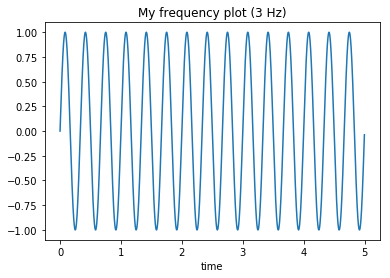

In [8]:
# Let's play with the FFT analysis in numpy and scipy and frequency-domain plotting in matplotlib!
# First, let's make a simple signal to play with.

import matplotlib.pyplot as plt # matplot lib is the premiere plotting lib for Python: https://matplotlib.org/
import numpy as np # numpy is the premiere signal handling library for Python: http://www.numpy.org/

totalTimeOfSignalInSecs = 5
freq = 3 # in Hz
samplingRate = 512

# Create an array from 0 to totalTimeOfSignalInSecs * samplingRate 
# But we need to divide each value in this array by our samplingRate so that our time step (dt) is correct
#
# We use arange here rather than just range because arange is numpy's version of Python's built-in range... 
# so we create a numpy array rather than a regular Python array
time = np.arange(totalTimeOfSignalInSecs * samplingRate) / samplingRate
signal = np.sin(2 * np.pi * freq * time)

# TODO: now plot the signal. How would you do this?
fig, axes = plt.subplots()
axes.plot(time, signal)
axes.set(xlabel="time", title="My frequency plot ({} Hz)".format(freq))

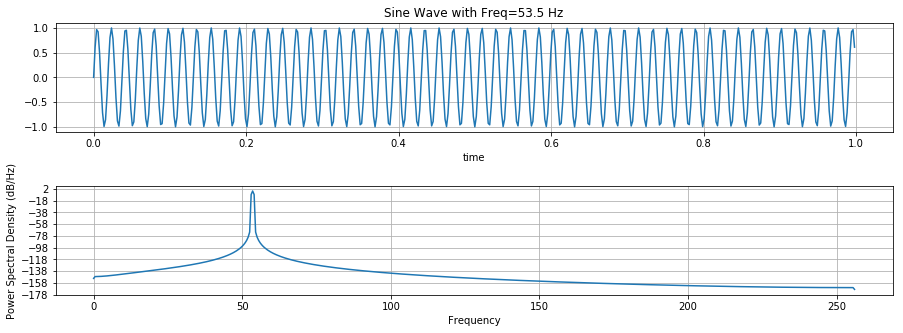

In [9]:
# Now, let's analyze the frequencies in our wave form using spectral analysis

freq = 53.5 # Hz

time = np.arange(totalTimeOfSignalInSecs * samplingRate) / samplingRate
signal = np.sin(2 * np.pi * freq * time) 

# TODO: Try playing around with different signals, what happens to the spectral analysis
# signal = np.sin(2 * np.pi * freq * time) + 0.05 * np.sin(2 * np.pi * 2 * freq * time) + 0.005 * np.sin(2 * np.pi * 3 * freq * time)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

ax1.plot(time[0:samplingRate], signal[0:samplingRate])
ax1.set(xlabel='time', title='Sine Wave with Freq={} Hz'.format(freq))
ax1.grid()

# By reducing the NFFT size, we get less precision in our signal analysis. 
# The y-axis is the amount of intensity (or power) at a given frequency
# Side note: db Scale is common when dealing with intensities because intensity,
# power, and energy are proportional to the square of the signal amplitude
# However, the primary point is using an fft to determine what frequencies exist in a signal
powerSpectrum, powerFreq = ax2.psd(signal, NFFT=1024, Fs=samplingRate)

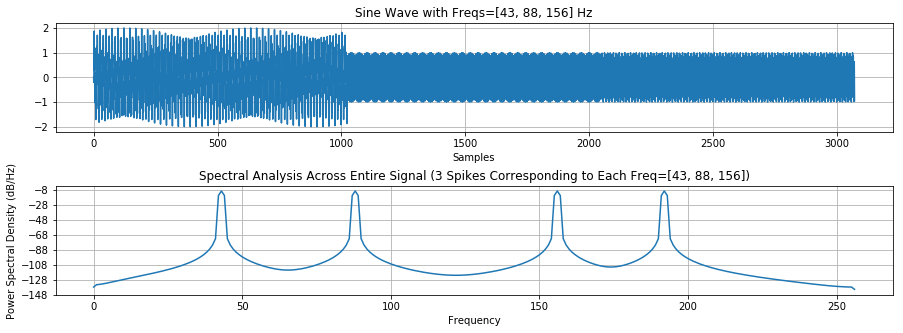

In [22]:
# But what if frequency changes during the signal. Let's add three different frequencies that occur at discrete
# time points.
timeOfEachSignalInSecs = 2

# arbitrarily chose 43 Hz, 88 Hz, 156 Hz. Don't change these for now (or if you do change them, change them back :)
freqs = [43, 88, 156] 

time = np.arange(timeOfEachSignalInSecs * samplingRate) / samplingRate
signal1 = np.sin(2 * np.pi * freqs[0] * time) #  + np.sin(2 * np.pi * 320 * time)
signal2 = np.sin(2 * np.pi * freqs[1] * time) 
signal3 = np.sin(2 * np.pi * freqs[2] * time) 

# TODO: You can use numpy's concatenate to concatenate the signals together
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html
signalConcatenated = np.concatenate([signal1, signal2, signal3])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

ax1.plot(signalConcatenated)
ax1.set(xlabel='Samples', title='Sine Wave with Freqs={} Hz'.format(freqs))
ax1.grid()
 
powerSpectrum, powerFreq = ax2.psd(signalConcatenated, NFFT=512, Fs=samplingRate)
ax2.set(title="Spectral Analysis Across Entire Signal (3 Spikes Corresponding to Each Freq={})".format(freqs))

print()

[Text(0.5,1,'Spectral Analysis Across Entire Signal (3 Spikes Corresponding to Each Freq=[43, 88, 156])')]

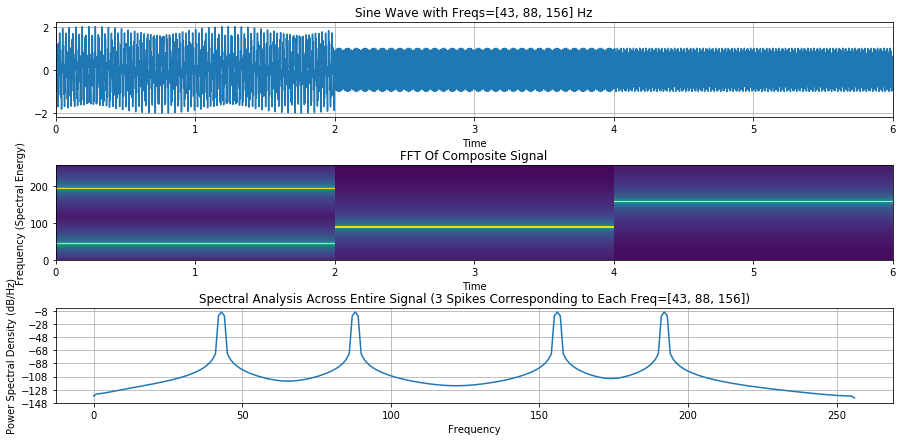

In [23]:
# But the above doesn't show us how the frequencies change over time. For this, we have to use a spectrogram
numSignals = len(freqs)
time = np.arange(timeOfEachSignalInSecs * samplingRate * numSignals) / samplingRate
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,7))
fig.subplots_adjust(hspace=0.5)

ax1.plot(time, signalConcatenated)
ax1.set(xlabel='Time', title='Sine Wave with Freqs={} Hz'.format(freqs))
ax1.set_xlim(xmin=0,xmax=timeOfEachSignalInSecs*numSignals)
ax1.grid()

# NFFT = # of points from sample used to calculate the FFT. We'll look at that next
# noverlap = # of overlapping points between NFFT windows
# See: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.specgram.html
ax2.specgram(signalConcatenated, NFFT=512, noverlap=0, Fs=samplingRate)
ax2.set(xlabel='Time', ylabel="Frequency (Spectral Energy)", title='FFT Of Composite Signal')

powerSpectrum, powerFreq = ax3.psd(signalConcatenated, NFFT=512, Fs=samplingRate)
ax3.set(title="Spectral Analysis Across Entire Signal (3 Spikes Corresponding to Each Freq={})".format(freqs))

In [ ]:
# Playing around with FFT resolution
# By increasing the FFT window size, you increase frequency resolution
# However, the drawback is that you might miss spurious signals that pop-up momentarily but
# not have enough energy compared to other signals to show up in your frequency analysis
numSignals = len(freqs)
time = np.arange(timeOfEachSignalInSecs * samplingRate * numSignals) / samplingRate
fig, axes = plt.subplots(4, 1, figsize=(15,12))
fig.subplots_adjust(hspace=0.5)

axes[0].plot(time, signalConcatenated)
axes[0].set(xlabel='Time', title='Sine Wave with Freqs={} Hz'.format(freqs))
axes[0].set_xlim(xmin=0,xmax=timeOfEachSignalInSecs*numSignals)
axes[0].grid()

# You can calculate your frequency resolution (that is the size of each frequency bin)
# by FreqResolution = SamplingRate / FFTWindowSize
fftWindowSize = 8
axes[1].specgram(signalConcatenated, NFFT=fftWindowSize, Fs=samplingRate, noverlap=0)
axes[1].set(xlabel='Time', ylabel="Frequency (Spectral Energy)", 
            title='FFT Of Composite Signal (NFFT={} FreqBinSize={} Hz)'.format(fftWindowSize, samplingRate/fftWindowSize))

# TODO MAKE TWO MORE PLOTS (e.g., for axes[2] and axes[3]) WITH DIFFERENT FFT WINDOW SIZES

print()

In [ ]:
# Recall from last lecture about additive synthesis. What if instead of having the three signals occur at different times, 
# they all occurred simultaneously!
totalTimeOfSignalInSecs = timeOfEachSignalInSecs * len(freqs)
time = np.arange(totalTimeOfSignalInSecs * samplingRate) / samplingRate
signal1 = np.sin(2 * np.pi * freqs[0] * time) 
signal2 = np.sin(2 * np.pi * freqs[1] * time) 
signal3 = np.sin(2 * np.pi * freqs[2] * time) 

signalAdditive = #TODO HOW DO WE PERFORM ADDITIVE SYNTHESIS?

fig, axes = plt.subplots(4, 1, figsize=(15,12))
fig.subplots_adjust(hspace=0.5)

# The first plot is just to show a zoomed in sample
zoomedInSamplingWindow = int(samplingRate / 1)
axes[0].plot(time[0:zoomedInSamplingWindow], signalAdditive[0:zoomedInSamplingWindow])
axes[0].set(xlabel='Time', title='{} Samples of Sine Wave with Freqs={} Hz'.format(zoomedInSamplingWindow, freqs))
axes[0].set_xlim(xmin=0,xmax=zoomedInSamplingWindow/samplingRate)
axes[0].grid()

# Now show the raw plot
axes[1].plot(time, signalAdditive)
axes[1].set(xlabel='Time', title='Sine Wave with Freqs={} Hz'.format(freqs))
axes[1].set_xlim(xmin=0,xmax=totalTimeOfSignalInSecs)
axes[1].grid()

# And show a spectrogram and spectral analysis
fftWindowSize = 512
axes[2].specgram(signalAdditive, NFFT=fftWindowSize, Fs=samplingRate, noverlap=0)
axes[2].set(xlabel='Time', ylabel="Frequency (Spectral Energy)", 
        title='FFT Of Additive Signal (NFFT={} FreqBinSize={} Hz)'.format(fftWindowSize, samplingRate/fftWindowSize))

powerSpectrum, powerFreq = axes[3].psd(signalAdditive, NFFT=512, Fs=samplingRate)
axes[3].set(title="Spectral Analysis Across Entire Signal")

# Filtering
Filtering involves convolving one signal (the filter signal) with another (your source signal). Perhaps the most common digital filter for motion analysis is the Butterworth filter, which Mladenov et al., 2009 used in their paper to filter out high frequency noise in their step tracker.

Using a digital filter is a two-step process:
1. You first create the digital filter with desired characteristics (cutoff frequency, phase shift, etc.)
2. You then apply this filter through convolution to your source signal

Expert Note (feel free to ignore): while you might not conceptualize a moving average filter like this, it can actually be thought of as a type of convolution. See http://matlabtricks.com/post-11/moving-average-by-convolution. Indeed, to apply a moving average filter with numpy, you simply do the following:
'''
windowSize = 10
netMagWithMeanFilter5 = np.convolve(sourceSignal, np.ones((windowSize,))/windowSize, mode='valid')
'''

In [ ]:
# What happens if we try a low-pass filter on this signal? Low-pass filters filter out high frequencies from our data and
# keep the lower frequencies.
# Resources:
# - http://scipy.github.io/old-wiki/pages/Cookbook/ButterworthBandpass
# - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.butter.html
from scipy.signal import butter, lfilter

# Set the desired cutoff frequency (here we select 115 Hz)
desiredCutOffFreq = 115

print("Frequencies that are in our signal={}. We are trying to create a low-pass filter that filters out all freqs greater than {}"
      .format(freqs, desiredCutOffFreq))

# The butterworth filter expects the cutoff frequency to be normalized between [0, Nyquist]
nyquistFreq = samplingRate / 2.0
desiredCutOffFreqNormalized = desiredCutOffFreq / nyquistFreq

# Ideally, with an infinite "filter order", you would get a perfect filter
# that cuts off all frequencies within your desired band. In practice, you
# are dealing with finite data and so a super high filter order will distort your signal
# Generally, filter orders can be relatively small (on the order of 10s or less like 6 or 9) but play around!
# http://scipy.github.io/old-wiki/pages/Cookbook/ButterworthBandpass
filterOrder = 40
b, a = butter(filterOrder, desiredCutOffFreqNormalized, btype='lowpass')

# Use lfilter to apply the filter: https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.lfilter.html
signalButterLowPass = lfilter(b, a, signalAdditive)

# TODO 
fig, axes = plt.subplots(3, 2, figsize=(15,12))
fig.subplots_adjust(hspace=0.5)

axes[0][0].plot(time, signalAdditive)
axes[0][0].set(xlabel='Time', title='Original Sine Wave with Freqs={} Hz'.format(freqs))
axes[0][0].set_xlim(xmin=0,xmax=totalTimeOfSignalInSecs)
axes[0][0].grid()

axes[0][1].plot(time, signalButterLowPass)
axes[0][1].set(xlabel='Time', title='Low-Pass Filter Version (Cutoff={} Hz)'.format(desiredCutOffFreq))
axes[0][1].set_xlim(xmin=0,xmax=totalTimeOfSignalInSecs)
axes[0][1].grid()

fftWindowSize = 512
axes[1][0].specgram(signalAdditive, NFFT=fftWindowSize, Fs=samplingRate, noverlap=0)
axes[1][0].set(xlabel='Time', ylabel="Frequency (Spectral Energy)", 
        title='FFT of Original Additive Signal (NFFT={} FreqBinSize={} Hz)'.format(fftWindowSize, samplingRate/fftWindowSize))

axes[1][1].specgram(signalButterLowPass, NFFT=fftWindowSize, Fs=samplingRate, noverlap=0)
axes[1][1].set(xlabel='Time', ylabel="Frequency (Spectral Energy)", 
        title='FFT of Low-Pass Filtered Signal (NFFT={} FreqBinSize={} Hz)'.format(fftWindowSize, samplingRate/fftWindowSize))

powerSpectrum, powerFreq = axes[2][0].psd(signalAdditive, NFFT=fftWindowSize, Fs=samplingRate)
axes[2][0].set(title="Spectral Analysis Across Original Signal")

powerSpectrum, powerFreq = axes[2][1].psd(signalButterLowPass, NFFT=fftWindowSize, Fs=samplingRate)
axes[2][1].set(title="Spectral Analysis Across Filtered Signal")

print()

In [ ]:
# Now let's create a high-pass filter at 125Hz (so filter out the lower two frequencies)
desiredCutOffFreq = 125

print("Frequencies that are in our signal={}. We are trying to create a high-pass filter that filters out all freqs less than {}"
      .format(freqs, desiredCutOffFreq))

# The butterworth filter expects the cutoff frequency to be normalized between [0, Nyquist]
nyquistFreq = samplingRate / 2.0
desiredCutOffFreqNormalized = desiredCutOffFreq / nyquistFreq

# TODO: Implement the rest! Much can be copy/pasted from the above cell


In [ ]:
# Recall that another pre-processing step in addition to filtering is de-meaning or de-trending our data
# Let's play around with that
from scipy import signal
a = np.random.rand(50) * 50
b = np.array(range(0,50))
c = a + b

# scipy has a nice detrending function
# see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.detrend.html
c_detrended = #TODO FINISH THIS

# TODO: After you've finished and plotted the detrended signal
# try to create more noise and see how well the scipy detrend algorithm performs...

fig, axes = plt.subplots()
axes.plot(c, label="c (avg={:0.1f})".format(np.mean(c)))
axes.plot(c_detrended, label="c_detrended (avg={:0.1f})".format(np.mean(c_detrended)))
axes.legend()

# Signal comparisons
One of the most basic signal comparison approaches is just to take the Euclidean distance between two signals. A slightly better approach is to first attempt to align those signals to minimize the distance.

In [ ]:
# Use Euclidean distance to compare two signals
from scipy import signal
from scipy.spatial import distance

a = [8, 9, 10, 11, 8, 7, 5, 4, 0, 0, 1, 2, 3, 4, 3, 5, 7]
b = [0, 0, 1, 2, 3, 4, 3, 5, 7, 8, 9, 10, 9, 8, 7, 5, 4]

# Use scipy's euclidean distance function to compare a to b
# the similarity between a and b signals
# See: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.euclidean.html
euclidDistanceAToB = #TODO COMPLETE THIS LINE


# TODO Graph signals a and b. Set the title of your graph such that the euclidDistanceAToB is displayed


In [ ]:
# Now let's use cross-correlation to align the signals before comparison. This is a very powerful technique.
# The cross-correlation is a measure of similarity of two series as a function of the displacement of
# one signal relative to the other (also known as a sliding dot product)
# The formula essentially slides one signal a along the x-axis of fixed signal b, 
# calculating the integral of their product at each position. The best positional match
# between signals is when this dot product is maximized

# TODO: use https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html
correlateAToB = # TODO calculate the cross-correlation array between AToB

fig, axes = plt.subplots(2, figsize=(6, 8))
fig.subplots_adjust(hspace=0.3)

axes[0].plot(a, alpha=0.7, label="a")
axes[0].plot(b, alpha=0.7, label="b")
axes[0].legend()
axes[0].set_title("Raw Graphs | Euclidean Distance From A to B = {}".format(euclidDistanceAToB))

axes[1].plot(correlateAToB, alpha=0.7)
axes[1].set_title("Correlation Between A and B")

print()

In [ ]:
# We are going to use the best match point (found via cross-correlation) to better align the signals
# The best correlation point is at the highest value in this array
bestCorrelationPoint = np.argmax(correlateAToB)

indexShift = #TODO how much should we shift our signal? 

# We will use numpy's roll function to shift our signal. We could also use np.pad to pad with zero
a_shifted = np.roll(a, indexShift)

euclidDistanceAShiftedToB = #TODO calculate the distance between a_shifted and b

print("Best correlation point={}, euclidean distance a to b={}, euclidean distance a_shifted to b={}"
      .format(bestCorrelationPoint, euclidDistanceAToB, euclidDistanceAShiftedToB))

fig, axes = plt.subplots(3, figsize=(6, 13))
fig.subplots_adjust(hspace=0.3)

axes[0].plot(a, alpha=0.7, label="a")
axes[0].plot(b, alpha=0.7, label="b")
axes[0].legend()
axes[0].set_title("Raw Graphs | Euclidean Distance From A to B = {}".format(euclidDistanceAToB))

# Note that the correlation signal is the length of a 
axes[1].plot(correlateAToB, alpha=0.7)
axes[1].set_title("Correlation Between A and B (Best Correlation Index = {})".format(bestCorrelationPoint))

axes[2].plot(a_shifted, alpha=0.7, label="a_shifted")
axes[2].plot(b, alpha=0.7, label="b")
axes[2].legend()
axes[2].set_title("Shifted Graph | Euclidean Distance From A_Shifted to B = {}".format(euclidDistanceAShiftedToB))

print()

# Closing note
If you want the plots to be interactive, type the following in a cell:
```
%matplotlib notebook 
```
See: https://stackoverflow.com/a/41125787